<h1>Final project</h1>

<h2>Food Delivery Dataset</h2>

Origin of the dataset: https://www.kaggle.com/datasets/gauravmalik26/food-delivery-dataset

<h2>About this dataset</h2>

Food delivery is a courier service in which a restaurant, store, or independent food-delivery company delivers food to a customer. An order is typically made either through a restaurant or grocer's website or mobile app, or through a food ordering company. The delivered items can include entrees, sides, drinks, desserts, or grocery items and are typically delivered in boxes or bags. The delivery person will normally drive a car, but in bigger cities where homes and restaurants are closer together, they may use bikes or motorized scooters.

<h2>Files</h2>

1) train.csv - the training set

2) test.csv - the test set

<h2>Objective</h2>

Predict estimated time for food delivery.

Evaluation metric is r2 score.

<h2>Part 1. Data cleaning and preparation</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yaml
import geopy 
from geopy import distance
import datetime
import pickle


from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

 Let's check out what do we have inside given datasets.

In [2]:
with open('../params.yaml') as file:
    config = yaml.safe_load(file)

In [3]:
train = pd.read_csv(config['Data']['train'])
train.head()

ID Delivery_person_ID Delivery_person_Age Delivery_person_Ratings  \
0  0x4607     INDORES13DEL02                   37                     4.9   
1  0xb379     BANGRES18DEL02                   34                     4.5   
2  0x5d6d     BANGRES19DEL01                   23                     4.4   
3  0x7a6a    COIMBRES13DEL02                   38                     4.7   
4  0x70a2     CHENRES12DEL01                   32                     4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude  Order_Date Time_Orderd Time_Order_picked  \
0                    75.912471  19-03-2022    11:30:00          11:45:00   
1                    77.813237  25-03-2022    19:45:00          19:50:00   
2                    77.688400  19-03-2022    08:30:00          08:45:00   
3                    77.026494  05-04-2022    18:00:00          18:10:00   
4                    80.289982  26-03-2022    13:30:00          13:45:00   

       Weatherconditions Road_traffic_density  Vehicle_condition  \
0       conditions Sunny                High                   2   
1      conditions Stormy                 Jam                   2   
2  conditions Sandstorms                 Low                   0   
3       conditions Sunny              Medium                   0   
4      conditions Cloudy                High                   1   

  Type_of_order Type_of_vehicle multiple_deliveries Festival            City  \
0        Snack      motorcycle                    0      No           Urban    
1        Snack         scooter                    1      No   Metropolitian    
2       Drinks      motorcycle                    1      No           Urban    
3       Buffet      motorcycle                    1      No   Metropolitian    
4        Snack         scooter                    1      No   Metropolitian    

  Time_taken(min)  
0        (min) 24  
1        (min) 33  
2        (min) 26  
3        (min) 21  
4        (min) 30

In [4]:
test = pd.read_csv(config['Data']['test'])
test.head()

ID Delivery_person_ID Delivery_person_Age Delivery_person_Ratings  \
0  0x2318    COIMBRES13DEL01                 NaN                     NaN    
1  0x3474     BANGRES15DEL01                   28                     4.6   
2  0x9420      JAPRES09DEL03                   23                     4.5   
3  0x72ee      JAPRES07DEL03                   21                     4.8   
4  0xa759     CHENRES19DEL01                   31                     4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            11.003669             76.976494                   11.043669   
1            12.975377             77.696664                   13.085377   
2            26.911378             75.789034                   27.001378   
3            26.766536             75.837333                   26.856536   
4            12.986047             80.218114                   13.096047   

   Delivery_location_longitude  Order_Date Time_Orderd Time_Order_picked  \
0                    77.016494  30-03-2022        NaN           15:05:00   
1                    77.806664  29-03-2022    20:30:00          20:35:00   
2                    75.879034  10-03-2022    19:35:00          19:45:00   
3                    75.927333  02-04-2022    17:15:00          17:20:00   
4                    80.328114  27-03-2022    18:25:00          18:40:00   

   Weatherconditions Road_traffic_density  Vehicle_condition Type_of_order  \
0     conditions NaN                 NaN                   3       Drinks    
1   conditions Windy                 Jam                   0        Snack    
2  conditions Stormy                 Jam                   0       Drinks    
3     conditions Fog              Medium                   1         Meal    
4   conditions Sunny              Medium                   2       Drinks    

     Type_of_vehicle multiple_deliveries Festival            City  
0  electric_scooter                    1      No   Metropolitian   
1        motorcycle                    1      No   Metropolitian   
2        motorcycle                    1      No   Metropolitian   
3           scooter                    1      No   Metropolitian   
4           scooter                    1      No   Metropolitian

For now let's focus on the fist one (train.csv).

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [6]:
train.isna().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

When we use isna().sum() we don't see any NaN values in the dataset, but if we look at the head of the dataset - we see that these values exists. 
Let's try to convert them into numpy datatype.

In [7]:
for column in train.columns:
    train.loc[train[column] == 'NaN', column] = np.nan
    train.loc[train[column] == 'NaN ', column] = np.nan

In [8]:
train.isna().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions                 0
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64

In [9]:
# Function for data cleaning

def clean_data(data):
    data_cleaned = data.copy()

# Standardizing header names: 
# 1) Converting column names to lowercase
# 2) Deleting spaces

    cols = []
    for col in data_cleaned.columns:
        cols.append(col.lower().replace(' ', ''))
    data_cleaned.columns = cols

# Deleting duplicates

    data_cleaned = data_cleaned.drop_duplicates()
    
# Dealing with NaN values
    
    for column in data_cleaned.columns:
        data_cleaned.loc[data_cleaned[column] == 'NaN', column] = np.nan
        data_cleaned.loc[data_cleaned[column] == 'NaN ', column] = np.nan
    
# Filling all NaN-values of numerical columns with their mean value
# Column 'delivery_person_age'

    data_cleaned['delivery_person_age'] = data_cleaned['delivery_person_age'].astype('float64')
    data_cleaned['delivery_person_age'] = data_cleaned['delivery_person_age'].fillna(round(np.mean(data_cleaned['delivery_person_age'])))
    data_cleaned['delivery_person_age'] = data_cleaned['delivery_person_age'].astype('int')
    
# Column 'multiple_deliveries'
    data_cleaned['multiple_deliveries'] = data_cleaned['multiple_deliveries'].astype('float64')
    data_cleaned['multiple_deliveries'] = data_cleaned['multiple_deliveries'].fillna(round(np.mean(data_cleaned['multiple_deliveries'])))
    data_cleaned['multiple_deliveries'] = data_cleaned['multiple_deliveries'].astype('int')
    
# Column 'delivery_person_ratings'

    data_cleaned['delivery_person_ratings'] = data_cleaned['delivery_person_ratings'].astype('float64')
    data_cleaned['delivery_person_ratings'] = data_cleaned['delivery_person_ratings'].fillna(round(np.mean(data_cleaned['delivery_person_ratings']), 1))

# Deleting missing values in the column 'time_orderd' and 'festival'

    data_cleaned.dropna(subset = ['time_orderd'], axis = 0, inplace = True)
    data_cleaned.dropna(subset = ['festival'], axis = 0, inplace = True)

# Column 'city'
    data_cleaned['city'] = data_cleaned['city'].fillna(data_cleaned['city'].mode()[0])

# Dealing with other columns data types
# Column 'vehicle_condition'

    data_cleaned['vehicle_condition'] = data_cleaned['vehicle_condition'].astype('int')

# Column 'time_orderd' and 'time_order_picked'
    data_cleaned['time_orderd'] = pd.to_datetime(data_cleaned['order_date'] + ' ' + data_cleaned['time_orderd'])
    data_cleaned['time_order_picked'] = pd.to_datetime(data_cleaned['order_date'] + ' ' + data_cleaned['time_order_picked'])

# Column 'order_date'

    data_cleaned['order_date'] = pd.to_datetime(data_cleaned['order_date'], format='%d-%m-%Y', errors='ignore')
    #data_cleaned['order_date'] = pd.to_datetime(data_cleaned['order_date'], dayfirst = True)
      
# Deleting unnecessary information from the column values
# By using str.split with expand = True we will split elements into separate columns (https://stackoverflow.com/questions/63796316/string-split-with-expand-true-can-anyone-explain-what-is-the-meaning) 

    data_cleaned['weatherconditions'] = data_cleaned['weatherconditions'].str.split(" ", expand = True)[1]

# Converting all the values of the columns (except ids) to lowercase
# and deleting spaces (there are lots of unnecessary spaces after words)

    categorical = data_cleaned.select_dtypes(object)
    categorical_new = categorical.drop(['id'], axis=1)
    categorical_new = categorical_new.drop(['delivery_person_id'], axis=1)

    for column_name in categorical_new.columns:
        data_cleaned[column_name] = data_cleaned[column_name].str.lower().replace(' ', '')
         
    return data_cleaned

**Let's apply this function to 'train' dataset**.

In [10]:
train_cleaned = clean_data(train)

Adding a few more adjustments (can't use them inside of the function, because there is no 'time_taken(min)' column in the 'test' set).

In [11]:
train_cleaned['time_taken(min)'] = train_cleaned['time_taken(min)'].str.split(" ", expand = True)[1]
train_cleaned['time_taken(min)'] = train_cleaned['time_taken(min)'].astype('float64')

Cheking that we don't have any NaN-values and that all data types are correctly identified:

In [12]:
train_cleaned.isna().sum()

id                             0
delivery_person_id             0
delivery_person_age            0
delivery_person_ratings        0
restaurant_latitude            0
restaurant_longitude           0
delivery_location_latitude     0
delivery_location_longitude    0
order_date                     0
time_orderd                    0
time_order_picked              0
weatherconditions              0
road_traffic_density           0
vehicle_condition              0
type_of_order                  0
type_of_vehicle                0
multiple_deliveries            0
festival                       0
city                           0
time_taken(min)                0
dtype: int64

In [13]:
train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43643 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           43643 non-null  object        
 1   delivery_person_id           43643 non-null  object        
 2   delivery_person_age          43643 non-null  int64         
 3   delivery_person_ratings      43643 non-null  float64       
 4   restaurant_latitude          43643 non-null  float64       
 5   restaurant_longitude         43643 non-null  float64       
 6   delivery_location_latitude   43643 non-null  float64       
 7   delivery_location_longitude  43643 non-null  float64       
 8   order_date                   43643 non-null  datetime64[ns]
 9   time_orderd                  43643 non-null  datetime64[ns]
 10  time_order_picked            43643 non-null  datetime64[ns]
 11  weatherconditions            43643 non-nu

In [14]:
train_cleaned.head()

id delivery_person_id  delivery_person_age  delivery_person_ratings  \
0  0x4607     INDORES13DEL02                    37                      4.9   
1  0xb379     BANGRES18DEL02                    34                      4.5   
2  0x5d6d     BANGRES19DEL01                    23                      4.4   
3  0x7a6a    COIMBRES13DEL02                    38                      4.7   
4  0x70a2     CHENRES12DEL01                    32                      4.6   

   restaurant_latitude  restaurant_longitude  delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   delivery_location_longitude order_date         time_orderd  \
0                    75.912471 2022-03-19 2022-03-19 11:30:00   
1                    77.813237 2022-03-25 2022-03-25 19:45:00   
2                    77.688400 2022-03-19 2022-03-19 08:30:00   
3                    77.026494 2022-04-05 2022-05-04 18:00:00   
4                    80.289982 2022-03-26 2022-03-26 13:30:00   

    time_order_picked weatherconditions road_traffic_density  \
0 2022-03-19 11:45:00             sunny                high    
1 2022-03-25 19:50:00            stormy                 jam    
2 2022-03-19 08:45:00        sandstorms                 low    
3 2022-05-04 18:10:00             sunny              medium    
4 2022-03-26 13:45:00            cloudy                high    

   vehicle_condition type_of_order type_of_vehicle  multiple_deliveries  \
0                  2        snack      motorcycle                     0   
1                  2        snack         scooter                     1   
2                  0       drinks      motorcycle                     1   
3                  0       buffet      motorcycle                     1   
4                  1        snack         scooter                     1   

  festival            city  time_taken(min)  
0      no           urban              24.0  
1      no   metropolitian              33.0  
2      no           urban              26.0  
3      no   metropolitian              21.0  
4      no   metropolitian              30.0

In [15]:
train_cleaned.shape

(43643, 20)

**Let's apply the same cleaning function to the 'test' set:**

In [16]:
test_cleaned = clean_data(test)

In [17]:
test_cleaned.isnull().sum()

id                             0
delivery_person_id             0
delivery_person_age            0
delivery_person_ratings        0
restaurant_latitude            0
restaurant_longitude           0
delivery_location_latitude     0
delivery_location_longitude    0
order_date                     0
time_orderd                    0
time_order_picked              0
weatherconditions              0
road_traffic_density           0
vehicle_condition              0
type_of_order                  0
type_of_vehicle                0
multiple_deliveries            0
festival                       0
city                           0
dtype: int64

In [18]:
test_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10892 entries, 1 to 11398
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           10892 non-null  object        
 1   delivery_person_id           10892 non-null  object        
 2   delivery_person_age          10892 non-null  int64         
 3   delivery_person_ratings      10892 non-null  float64       
 4   restaurant_latitude          10892 non-null  float64       
 5   restaurant_longitude         10892 non-null  float64       
 6   delivery_location_latitude   10892 non-null  float64       
 7   delivery_location_longitude  10892 non-null  float64       
 8   order_date                   10892 non-null  datetime64[ns]
 9   time_orderd                  10892 non-null  datetime64[ns]
 10  time_order_picked            10892 non-null  datetime64[ns]
 11  weatherconditions            10892 non-nu

Now datasets are ready for further exploration.

<h2>Part 2. Data exploration</h2>

In [19]:
train_cleaned.head()

id delivery_person_id  delivery_person_age  delivery_person_ratings  \
0  0x4607     INDORES13DEL02                    37                      4.9   
1  0xb379     BANGRES18DEL02                    34                      4.5   
2  0x5d6d     BANGRES19DEL01                    23                      4.4   
3  0x7a6a    COIMBRES13DEL02                    38                      4.7   
4  0x70a2     CHENRES12DEL01                    32                      4.6   

   restaurant_latitude  restaurant_longitude  delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   delivery_location_longitude order_date         time_orderd  \
0                    75.912471 2022-03-19 2022-03-19 11:30:00   
1                    77.813237 2022-03-25 2022-03-25 19:45:00   
2                    77.688400 2022-03-19 2022-03-19 08:30:00   
3                    77.026494 2022-04-05 2022-05-04 18:00:00   
4                    80.289982 2022-03-26 2022-03-26 13:30:00   

    time_order_picked weatherconditions road_traffic_density  \
0 2022-03-19 11:45:00             sunny                high    
1 2022-03-25 19:50:00            stormy                 jam    
2 2022-03-19 08:45:00        sandstorms                 low    
3 2022-05-04 18:10:00             sunny              medium    
4 2022-03-26 13:45:00            cloudy                high    

   vehicle_condition type_of_order type_of_vehicle  multiple_deliveries  \
0                  2        snack      motorcycle                     0   
1                  2        snack         scooter                     1   
2                  0       drinks      motorcycle                     1   
3                  0       buffet      motorcycle                     1   
4                  1        snack         scooter                     1   

  festival            city  time_taken(min)  
0      no           urban              24.0  
1      no   metropolitian              33.0  
2      no           urban              26.0  
3      no   metropolitian              21.0  
4      no   metropolitian              30.0

In [20]:
# Function for data exploration

def explore_data(data):
    
    # Checking numerical and categoracal columns of the dataframe
    numerical = data.select_dtypes(np.number)
    categorical = data.select_dtypes(object)
    display(numerical.head())
    display(categorical.head())

    # Using Matplotlib to construct histograms for all numerical columns
    plt.style.context('ggplot')    
    for column_name in numerical.columns:
        plt.figure()
        fig,ax = plt.subplots()
        ax.set_title(column_name)
        plt.hist(numerical[column_name], bins=20)
        plt.show()
        display(numerical[column_name].unique())
    
    return data

In [21]:
# explore_data(train_cleaned)

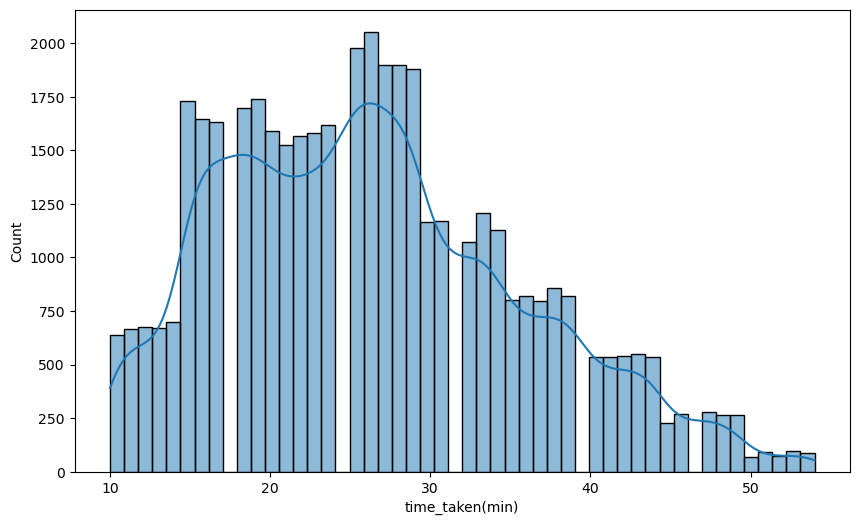

In [22]:
plt.figure(figsize=(10,6))
sns.histplot(train_cleaned['time_taken(min)'], bins = 50, kde = True)
plt.show()

In [23]:
train_cleaned['time_taken(min)'].min()

10.0

In [24]:
train_cleaned['time_taken(min)'].max()

54.0

<h2>Part 3. Feature selection</h2>

In [25]:
train_cleaned.head()

id delivery_person_id  delivery_person_age  delivery_person_ratings  \
0  0x4607     INDORES13DEL02                    37                      4.9   
1  0xb379     BANGRES18DEL02                    34                      4.5   
2  0x5d6d     BANGRES19DEL01                    23                      4.4   
3  0x7a6a    COIMBRES13DEL02                    38                      4.7   
4  0x70a2     CHENRES12DEL01                    32                      4.6   

   restaurant_latitude  restaurant_longitude  delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   delivery_location_longitude order_date         time_orderd  \
0                    75.912471 2022-03-19 2022-03-19 11:30:00   
1                    77.813237 2022-03-25 2022-03-25 19:45:00   
2                    77.688400 2022-03-19 2022-03-19 08:30:00   
3                    77.026494 2022-04-05 2022-05-04 18:00:00   
4                    80.289982 2022-03-26 2022-03-26 13:30:00   

    time_order_picked weatherconditions road_traffic_density  \
0 2022-03-19 11:45:00             sunny                high    
1 2022-03-25 19:50:00            stormy                 jam    
2 2022-03-19 08:45:00        sandstorms                 low    
3 2022-05-04 18:10:00             sunny              medium    
4 2022-03-26 13:45:00            cloudy                high    

   vehicle_condition type_of_order type_of_vehicle  multiple_deliveries  \
0                  2        snack      motorcycle                     0   
1                  2        snack         scooter                     1   
2                  0       drinks      motorcycle                     1   
3                  0       buffet      motorcycle                     1   
4                  1        snack         scooter                     1   

  festival            city  time_taken(min)  
0      no           urban              24.0  
1      no   metropolitian              33.0  
2      no           urban              26.0  
3      no   metropolitian              21.0  
4      no   metropolitian              30.0

We can create new features using latitude and longitude data (of the restaurant and of the delivery location).

We can use geopy library to calculate the distance between the restaurant and delivery location.
More info here: https://geopy.readthedocs.io/en/stable/#module-geopy.distance

In [26]:
# function for distance calculation

def calculate_distance(row):
    coordinates_restaurant = (row['restaurant_latitude'], row['restaurant_longitude'])
    coordinates_delivery_location = (row['delivery_location_latitude'], row['delivery_location_longitude'])
    return distance.distance(coordinates_restaurant, coordinates_delivery_location).km

In [27]:
# function for getting datetime column in seconds

def get_seconds(timedelta):
    return timedelta.seconds

In [28]:
# function for data preparation

def prepare_features(data):
    
# calculating distance
    data['distance'] = data.apply(calculate_distance, axis=1)
    
    data['year'] = data.order_date.dt.year
    data['month'] = data.order_date.dt.month
    data['day'] = data.order_date.dt.day
    data['day_of_week'] = data.order_date.dt.day_of_week.astype(int)
    data['is_weekend'] = data['day_of_week'].isin([5,6]).astype(int)
    data['hour_ordered'] = data.time_orderd.dt.hour
    
    
    data['preparation_time'] = (data['time_order_picked'] - data['time_orderd'])
    data['preparation_time'] = (data['preparation_time'].map(get_seconds))/60

    return data
    

In [29]:
train_prepared = prepare_features(train_cleaned)
test_prepared = prepare_features(test_cleaned)
train_prepared.head()

id delivery_person_id  delivery_person_age  delivery_person_ratings  \
0  0x4607     INDORES13DEL02                    37                      4.9   
1  0xb379     BANGRES18DEL02                    34                      4.5   
2  0x5d6d     BANGRES19DEL01                    23                      4.4   
3  0x7a6a    COIMBRES13DEL02                    38                      4.7   
4  0x70a2     CHENRES12DEL01                    32                      4.6   

   restaurant_latitude  restaurant_longitude  delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   delivery_location_longitude order_date         time_orderd  \
0                    75.912471 2022-03-19 2022-03-19 11:30:00   
1                    77.813237 2022-03-25 2022-03-25 19:45:00   
2                    77.688400 2022-03-19 2022-03-19 08:30:00   
3                    77.026494 2022-04-05 2022-05-04 18:00:00   
4                    80.289982 2022-03-26 2022-03-26 13:30:00   

    time_order_picked weatherconditions road_traffic_density  \
0 2022-03-19 11:45:00             sunny                high    
1 2022-03-25 19:50:00            stormy                 jam    
2 2022-03-19 08:45:00        sandstorms                 low    
3 2022-05-04 18:10:00             sunny              medium    
4 2022-03-26 13:45:00            cloudy                high    

   vehicle_condition type_of_order type_of_vehicle  multiple_deliveries  \
0                  2        snack      motorcycle                     0   
1                  2        snack         scooter                     1   
2                  0       drinks      motorcycle                     1   
3                  0       buffet      motorcycle                     1   
4                  1        snack         scooter                     1   

  festival            city  time_taken(min)   distance  year  month  day  \
0      no           urban              24.0   3.020737  2022      3   19   
1      no   metropolitian              33.0  20.143737  2022      3   25   
2      no           urban              26.0   1.549693  2022      3   19   
3      no   metropolitian              21.0   7.774497  2022      4    5   
4      no   metropolitian              30.0   6.197898  2022      3   26   

   day_of_week  is_weekend  hour_ordered  preparation_time  
0            5           1            11              15.0  
1            4           0            19               5.0  
2            5           1             8              15.0  
3            1           0            18              10.0  
4            5           1            13              15.0

In [30]:
features_with_target = train_prepared.drop(columns=['id','delivery_person_id','restaurant_latitude', 'restaurant_longitude', 'delivery_location_latitude', 'delivery_location_longitude', 'order_date', 'time_orderd', 'time_order_picked', 'day_of_week', 'year'],axis=1)

features_train = train_prepared.drop(columns=['id','delivery_person_id','restaurant_latitude', 'restaurant_longitude', 'delivery_location_latitude', 'delivery_location_longitude', 'order_date', 'time_orderd', 'time_order_picked', 'day_of_week', 'time_taken(min)', 'year'],axis=1)

Text(0.5, 1.0, 'Correlation matrix')

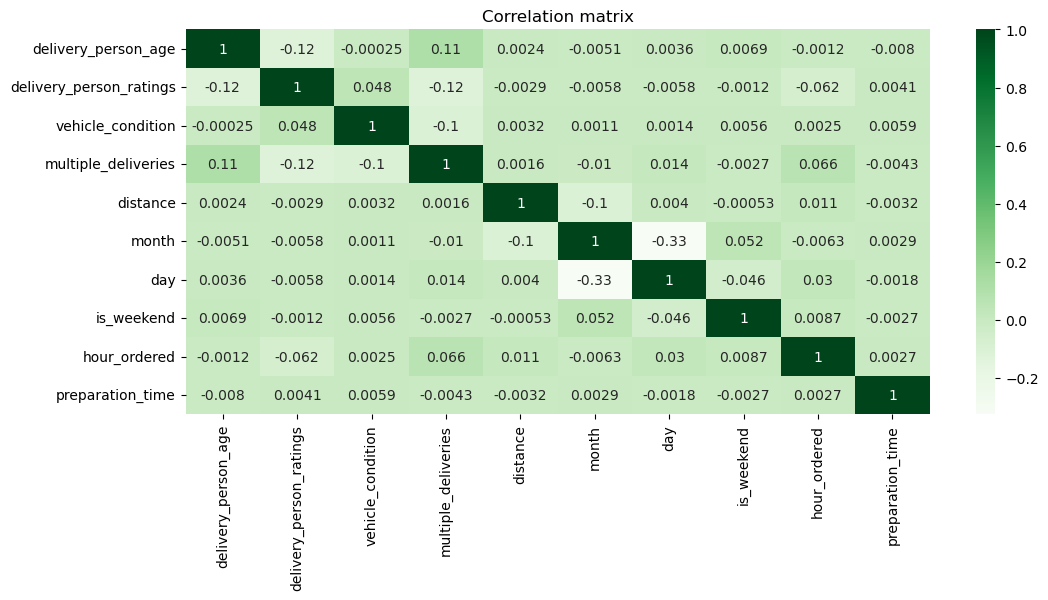

In [31]:
numerical = features_train.select_dtypes(np.number)
plt.figure(figsize=(12, 5))
heatmap = sns.heatmap(numerical.corr(), annot=True, cmap='Greens' )
heatmap.set_title('Correlation matrix')

There is no high correlation between the features, so no need to drop any additional columns.

**Scaling numerical features and encoding categorical features.**

As given numerical columns have very different values and we don't want it to influence on our target variable ('time_taken(min)') - we can use scaler (in this case MinMaxScaler).

Also, in order to use values from categorical columns in our prediction model, we need to convert them into numerical ones (we will use One Hot Encoder for it).

And then we can merge scaled numerical features and encoded categorical features together again.

In [32]:
# Function for data processing

def process_data(data):

    # X-y split
    y = data['time_taken(min)']
    X = data.drop(['time_taken(min)'], axis=1)
    
    # Spliting X into numerical and categorial columns
    X_num = X.select_dtypes(np.number)
    X_cat = X.select_dtypes(object)

    # Using the MinMaxScaler to normalize X_num
    # This will scale all within a range from 0.0 to 1.0.
    minMaxScaler = MinMaxScaler()
    minMaxScaler.fit(X_num)
    X_normalized = minMaxScaler.transform(X_num)
    X_normalized_data = pd.DataFrame(X_normalized, columns=X_num.columns)
    
    with open(config['Scalers']['minMax'], 'wb') as file:
        pickle.dump(minMaxScaler, file)


    # Using OneHot Encoder - it is converting categorial columns into multiple numerical columns
    encoder = OneHotEncoder()
    encoder.fit(X_cat)
    encoded = encoder.transform(X_cat).toarray()
    onehot_encoded_data = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())
    onehot_encoded_data.head()
    
    with open(config['Encoders']['OneHot'], 'wb') as file:
        pickle.dump(encoder, file)

    # Concatenating normalized numerical columns with one-hot-encoded columns
    X = pd.concat([X_normalized_data, onehot_encoded_data], axis=1)

    return X,y

In [33]:
X,y = process_data(features_with_target)
display(X.head())

delivery_person_age  delivery_person_ratings  vehicle_condition  \
0             0.894737                     0.96                1.0   
1             0.736842                     0.80                1.0   
2             0.157895                     0.76                0.0   
3             0.947368                     0.88                0.0   
4             0.631579                     0.84                0.5   

   multiple_deliveries  distance  month       day  is_weekend  hour_ordered  \
0             0.000000  0.000227    0.5  0.600000         1.0      0.478261   
1             0.333333  0.002727    0.5  0.800000         0.0      0.826087   
2             0.333333  0.000013    0.5  0.600000         1.0      0.347826   
3             0.333333  0.000921    1.0  0.133333         0.0      0.782609   
4             0.333333  0.000691    0.5  0.833333         1.0      0.565217   

   preparation_time  weatherconditions_cloudy  weatherconditions_fog  \
0               1.0                       0.0                    0.0   
1               0.0                       0.0                    0.0   
2               1.0                       0.0                    0.0   
3               0.5                       0.0                    0.0   
4               1.0                       1.0                    0.0   

   weatherconditions_sandstorms  weatherconditions_stormy  \
0                           0.0                       0.0   
1                           0.0                       1.0   
2                           1.0                       0.0   
3                           0.0                       0.0   
4                           0.0                       0.0   

   weatherconditions_sunny  weatherconditions_windy  \
0                      1.0                      0.0   
1                      0.0                      0.0   
2                      0.0                      0.0   
3                      1.0                      0.0   
4                      0.0                      0.0   

   road_traffic_density_high   road_traffic_density_jam   \
0                         1.0                        0.0   
1                         0.0                        1.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         1.0                        0.0   

   road_traffic_density_low   road_traffic_density_medium   \
0                        0.0                           0.0   
1                        0.0                           0.0   
2                        1.0                           0.0   
3                        0.0                           1.0   
4                        0.0                           0.0   

   type_of_order_buffet   type_of_order_drinks   type_of_order_meal   \
0                    0.0                    0.0                  0.0   
1                    0.0                    0.0                  0.0   
2                    0.0                    1.0                  0.0   
3                    1.0                    0.0                  0.0   
4                    0.0                    0.0                  0.0   

   type_of_order_snack   type_of_vehicle_electric_scooter   \
0                   1.0                                0.0   
1                   1.0                                0.0   
2                   0.0                                0.0   
3                   0.0                                0.0   
4                   1.0                                0.0   

   type_of_vehicle_motorcycle   type_of_vehicle_scooter   festival_no   \
0                          1.0                       0.0           1.0   
1                          0.0                       1.0           1.0   
2                          1.0                       0.0           1.0   
3                          1.0                       0.0           1.0   
4                          0.0                       1.0          

Now we can use this dataset for model building.

In [34]:
config


{'Data': {'train': '../Data/train.csv', 'test': '../Data/test.csv'},
 'Scalers': {'minMax': '../Scalers/minMaxScaler.pkl'},
 'Encoders': {'OneHot': '../Encoders/OneHotEncoder.pkl'},
 'Models': {'RandomForest': '../Models/random_forest.pkl'}}

<h2>Part 4. Model building</h2>

**I am going to use 3 models to predict the time of the delivery: Linear regression, KNN and Random Forest.**

In [35]:
# Function for model training and validation

# Here we use 20% of the data for testing and RNG-seed = 42

def train_and_validate_model(X, y, model, test_size=0.2, random_state=42):
    
    # Spliting X,y into train and test data
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, random_state=random_state)
    print('X_train:', X_train.shape)
    print('X_val:', X_val.shape)
    print('y_train:', y_train.shape)
    print('y_val:', y_val.shape)
     
    # Applying model
    model.fit(X_train,y_train)
    
    # Predicting training set
    pred_train = model.predict(X_train)

    # Predict test set
    pred_test  = model.predict(X_val)
    
    # Calculating r2_score X_train
    r2_score_train = r2_score(y_train, pred_train)
    print('R2 score train:', r2_score_train)
    
    
    # Calculating r2_score X_val
    r2_score_test = r2_score(y_val, pred_test)
    print('R2 score test:', r2_score_test)


**Linear regression**

In [36]:
linear_regression = LinearRegression()
train_and_validate_model(X, y, model=linear_regression)

X_train: (34914, 32)
X_val: (8729, 32)
y_train: (34914,)
y_val: (8729,)
R2 score train: 0.5696267242530046
R2 score test: 0.5632007058689322


**Random Forest**

In [37]:
# default settings with n_estimators = 50

random_forest = RandomForestClassifier(n_estimators = 50)
train_and_validate_model(X, y, model=random_forest)

X_train: (34914, 32)
X_val: (8729, 32)
y_train: (34914,)
y_val: (8729,)
R2 score train: 0.9999996720514969
R2 score test: 0.6966920838780399


In [38]:
# default settings with n_estimators = 200

random_forest = RandomForestClassifier(n_estimators = 200)
train_and_validate_model(X, y, model=random_forest)

X_train: (34914, 32)
X_val: (8729, 32)
y_train: (34914,)
y_val: (8729,)
R2 score train: 0.9999996720514969
R2 score test: 0.7071808394467503


In [39]:
# searching for the best params

params = {
    'n_estimators': [200],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'min_samples_leaf': [2,4],
    'min_samples_split': [2,4]
}

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

np.random.seed(42)

gs_rf = GridSearchCV(estimator=RandomForestClassifier(),
                  scoring='r2',
                  param_grid=params, cv=5, verbose=3)

gs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END criterion=gini, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.700 total time=   8.1s
[CV 2/5] END criterion=gini, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.707 total time=   7.5s
[CV 3/5] END criterion=gini, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.719 total time=   7.8s
[CV 4/5] END criterion=gini, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.715 total time=   7.9s
[CV 5/5] END criterion=gini, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.712 total time=   7.0s
[CV 1/5] END criterion=gini, min_samples_leaf=2, min_samples_split=4, n_estimators=200;, score=0.702 total time=   6.9s
[CV 2/5] END criterion=gini, min_samples_leaf=2, min_samples_split=4, n_estimators=200;, score=0.701 total time=   7.1s
[CV 3/5] END criterion=gini, min_samples_leaf=2, min_samples_split=4, n_estimators=200;, score=0.71

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 4], 'n_estimators': [200]},
             scoring='r2', verbose=3)

In [40]:
gs_rf.best_params_

{'criterion': 'log_loss',
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 200}

In [41]:
gs_rf.best_score_

0.7131625386771303

In [42]:
# using the best params 

random_forest = RandomForestClassifier(n_estimators = 200,
                               criterion='log_loss',
                               min_samples_leaf=4,
                               min_samples_split=4)
train_and_validate_model(X, y, model=random_forest)

X_train: (34914, 32)
X_val: (8729, 32)
y_train: (34914,)
y_val: (8729,)
R2 score train: 0.9853715290676008
R2 score test: 0.7127746655927636


In [ ]:
# .feature_importances_ - check it out! 
# for linear model .coef_ 

In [43]:
with open(config['Models']['RandomForest'], 'wb') as file:
    pickle.dump(random_forest, file)

**KNN**

In [44]:
# default settings

knn = KNeighborsClassifier()
train_and_validate_model(X, y, model=knn)

X_train: (34914, 32)
X_val: (8729, 32)
y_train: (34914,)
y_val: (8729,)
R2 score train: 0.13070460700787023
R2 score test: -0.03591214990628222


In [45]:
# default settings with n_neighbors = 8

knn = KNeighborsClassifier(n_neighbors = 8)
train_and_validate_model(X, y, model=knn)

X_train: (34914, 32)
X_val: (8729, 32)
y_train: (34914,)
y_val: (8729,)
R2 score train: 0.16572721150689962
R2 score test: 0.031699145630952


In [46]:
# default settings with n_neighbors = 300

knn = KNeighborsClassifier(n_neighbors = 300)
train_and_validate_model(X, y, model=knn)

X_train: (34914, 32)
X_val: (8729, 32)
y_train: (34914,)
y_val: (8729,)
R2 score train: 0.2634624244216105
R2 score test: 0.2530186516474153


In [47]:
# searching for the best params

params = {
    'n_neighbors': [2, 5, 100, 300],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

np.random.seed(42)

gs_knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=params, cv=5, verbose=3)


gs_knn.fit(X_train, y_train)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END algorithm=auto, n_neighbors=2, weights=uniform;, score=0.063 total time=   0.4s
[CV 2/5] END algorithm=auto, n_neighbors=2, weights=uniform;, score=0.065 total time=   0.5s
[CV 3/5] END algorithm=auto, n_neighbors=2, weights=uniform;, score=0.068 total time=   0.6s
[CV 4/5] END algorithm=auto, n_neighbors=2, weights=uniform;, score=0.064 total time=   0.5s
[CV 5/5] END algorithm=auto, n_neighbors=2, weights=uniform;, score=0.064 total time=   0.5s
[CV 1/5] END algorithm=auto, n_neighbors=2, weights=distance;, score=0.067 total time=   0.3s
[CV 2/5] END algorithm=auto, n_neighbors=2, weights=distance;, score=0.065 total time=   0.2s
[CV 3/5] END algorithm=auto, n_neighbors=2, weights=distance;, score=0.066 total time=   0.3s
[CV 4/5] END algorithm=auto, n_neighbors=2, weights=distance;, score=0.063 total time=   0.2s
[CV 5/5] END algorithm=auto, n_neighbors=2, weights=distance;, score=0.066 total time=   0.3s
[CV

[CV 5/5] END algorithm=kd_tree, n_neighbors=2, weights=uniform;, score=0.064 total time=   3.6s
[CV 1/5] END algorithm=kd_tree, n_neighbors=2, weights=distance;, score=0.067 total time=   3.4s
[CV 2/5] END algorithm=kd_tree, n_neighbors=2, weights=distance;, score=0.065 total time=   3.4s
[CV 3/5] END algorithm=kd_tree, n_neighbors=2, weights=distance;, score=0.066 total time=   4.6s
[CV 4/5] END algorithm=kd_tree, n_neighbors=2, weights=distance;, score=0.063 total time=   3.7s
[CV 5/5] END algorithm=kd_tree, n_neighbors=2, weights=distance;, score=0.066 total time=   3.8s
[CV 1/5] END algorithm=kd_tree, n_neighbors=5, weights=uniform;, score=0.055 total time=   4.9s
[CV 2/5] END algorithm=kd_tree, n_neighbors=5, weights=uniform;, score=0.055 total time=   5.1s
[CV 3/5] END algorithm=kd_tree, n_neighbors=5, weights=uniform;, score=0.062 total time=   5.3s
[CV 4/5] END algorithm=kd_tree, n_neighbors=5, weights=uniform;, score=0.056 total time=   5.4s
[CV 5/5] END algorithm=kd_tree, n_n

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [2, 5, 100, 300],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [48]:
gs_knn.best_params_

{'algorithm': 'auto', 'n_neighbors': 300, 'weights': 'distance'}

In [49]:
gs_knn.best_score_

0.06965673848914003

In [50]:
# using the best params 

knn = KNeighborsClassifier(algorithm = 'auto', n_neighbors = 300, weights = 'distance')
train_and_validate_model(X, y, model=knn)

X_train: (34914, 32)
X_val: (8729, 32)
y_train: (34914,)
y_val: (8729,)
R2 score train: 0.9999996720514969
R2 score test: 0.284598969811241


**Conclusion**

**Random Forest gives us the best result** (**R2 score train: 0.9847444915295399, R2 score test: 0.7069023417012161**) with these parameters:

random_forest = RandomForestClassifier (n_estimators = 200, criterion='log_loss', min_samples_leaf=4, min_samples_split=4)
                               
train_and_validate_model(X, y, model=random_forest)

**So we can use test set with the same model and predict food delivery time.**

In [51]:
with open(config['Scalers']['minMax'], 'rb') as file:
        minMaxScaler = pickle.load(file)
        
with open(config['Encoders']['OneHot'], 'rb') as file:
        encoder  = pickle.load(file)
        
with open(config['Models']['RandomForest'], 'rb') as file:
    random_forest  = pickle.load(file)

In [52]:
features_test = test_prepared.drop(columns=['id','delivery_person_id','restaurant_latitude', 'restaurant_longitude', 'delivery_location_latitude', 'delivery_location_longitude', 'order_date', 'time_orderd', 'time_order_picked', 'day_of_week', 'year'],axis=1)

In [53]:
# Spliting features_test into numerical and categorial columns

X_num = features_test.select_dtypes(np.number)
X_cat = features_test.select_dtypes(object)

# Using the MinMaxScaler to normalize X_num
# This will scale all within a range from 0.0 to 1.0.

X_normalized = minMaxScaler.transform(X_num)
X_normalized_data = pd.DataFrame(X_normalized, columns=X_num.columns)

# Using OneHot Encoder - it is converting categorial columns into multiple numerical columns

encoded = encoder.transform(X_cat).toarray()
onehot_encoded_data = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())

# Concatenating normalized numerical columns with one-hot-encoded columns
X_test = pd.concat([X_normalized_data, onehot_encoded_data], axis=1)

In [54]:
pred_test  = random_forest.predict(X_test)

**Predicting food time delivery for 'test' set.**

In [55]:
pred_test

array([25., 34., 25., ..., 31., 20., 20.])